In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
file_path = '/content/drive/MyDrive/KDSH 2024/btc_5m.csv'
btc_data = pd.read_csv(file_path)

In [ ]:
btc_data['datetime'] = pd.to_datetime(btc_data['datetime'])

In [ ]:
btc_data.sort_values(by='datetime', inplace=True)

In [ ]:
btc_data['close_lag1'] = btc_data['close'].shift(1)
btc_data['close_lag2'] = btc_data['close'].shift(2)
btc_data['close_lag3'] = btc_data['close'].shift(3)

In [ ]:
btc_data.dropna(inplace=True)

In [ ]:
X = btc_data[['open', 'high', 'low', 'volume', 'close_lag1', 'close_lag2', 'close_lag3']]
y = btc_data['close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror')


In [ ]:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1970535.7667543548


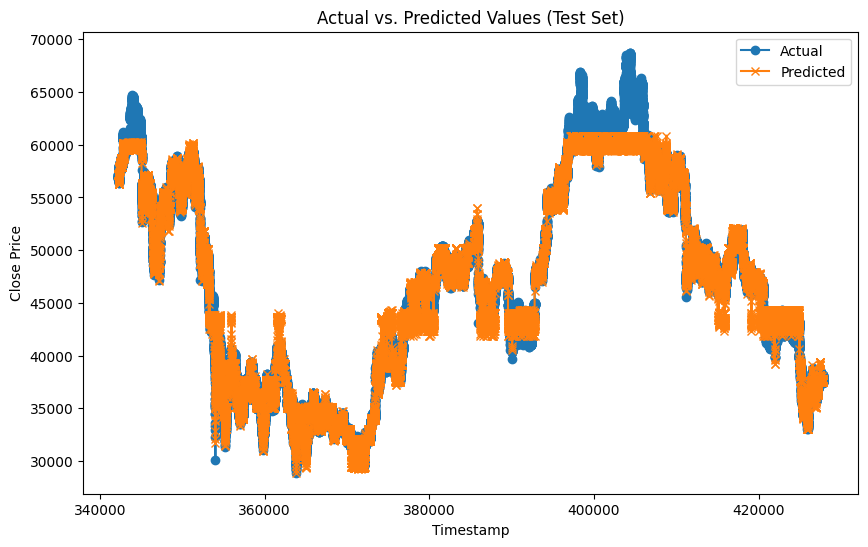

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual', marker='o')
plt.plot(X_test.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9784191175824966


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error for btc_5m.csv: 1970535.7667543548


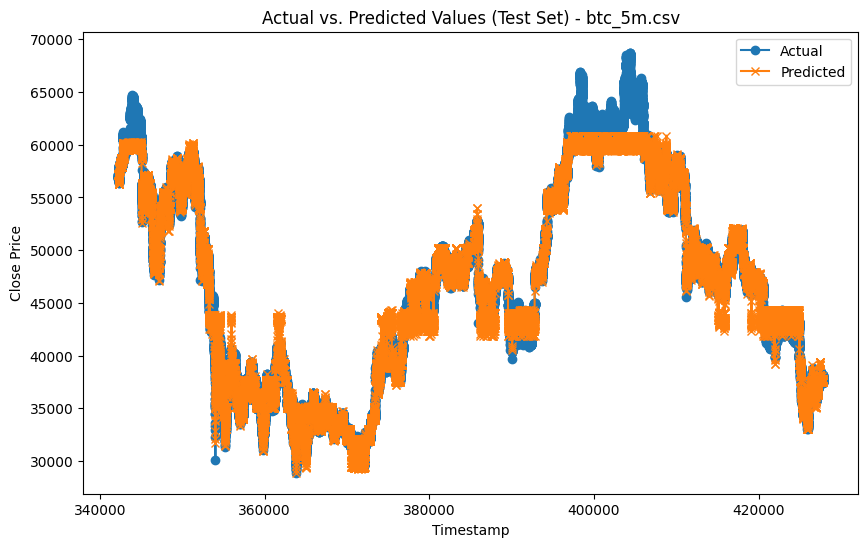

R-squared for btc_5m.csv: 0.9784191175824966
--------------------------------------------------
Mean Squared Error for btc_3m.csv: 2073059.7191400146


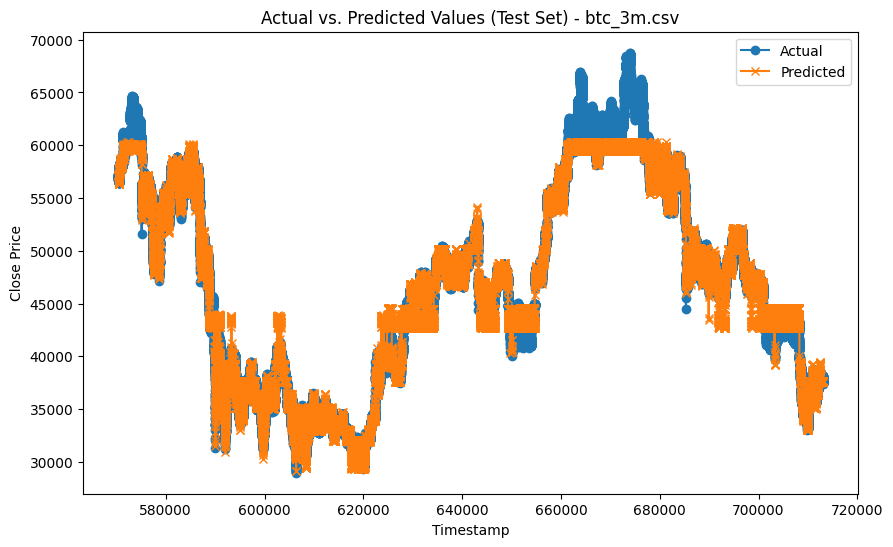

R-squared for btc_3m.csv: 0.9772976033406324
--------------------------------------------------
Mean Squared Error for btc_15m.csv: 2041855.287952003


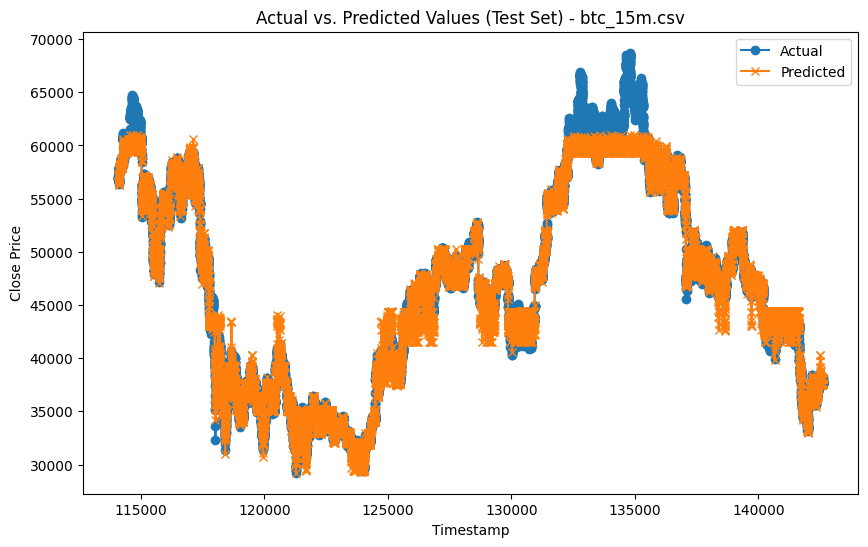

R-squared for btc_15m.csv: 0.977638697555373
--------------------------------------------------
Mean Squared Error for btc_30m.csv: 1887121.164980665


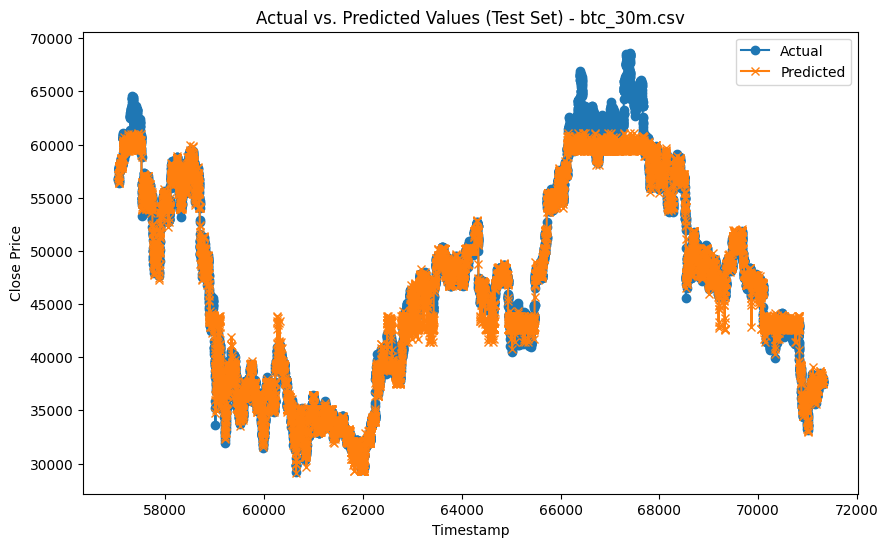

R-squared for btc_30m.csv: 0.9793286413597407
--------------------------------------------------
Mean Squared Error for btc_6h.csv: 2259323.3980591698


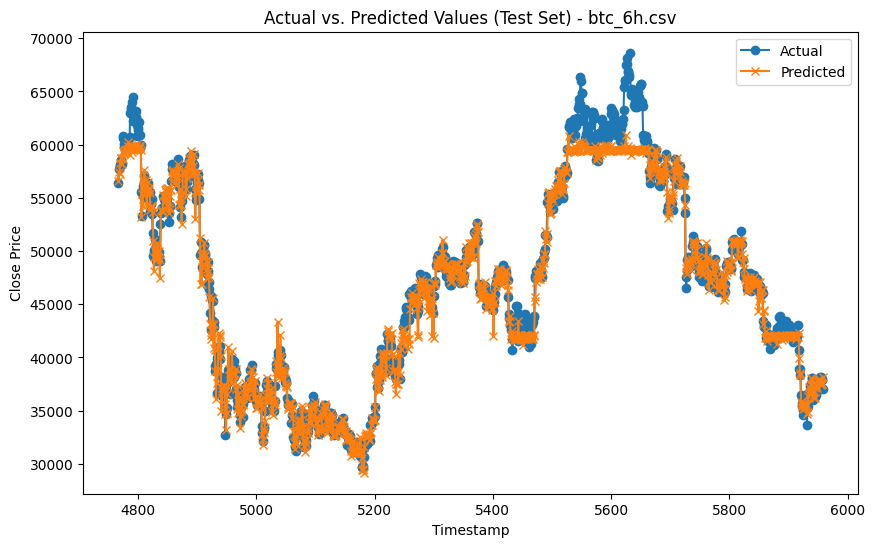

R-squared for btc_6h.csv: 0.9751298163812819
--------------------------------------------------
Mean Squared Error for btc_1h.csv: 2017029.3674404498


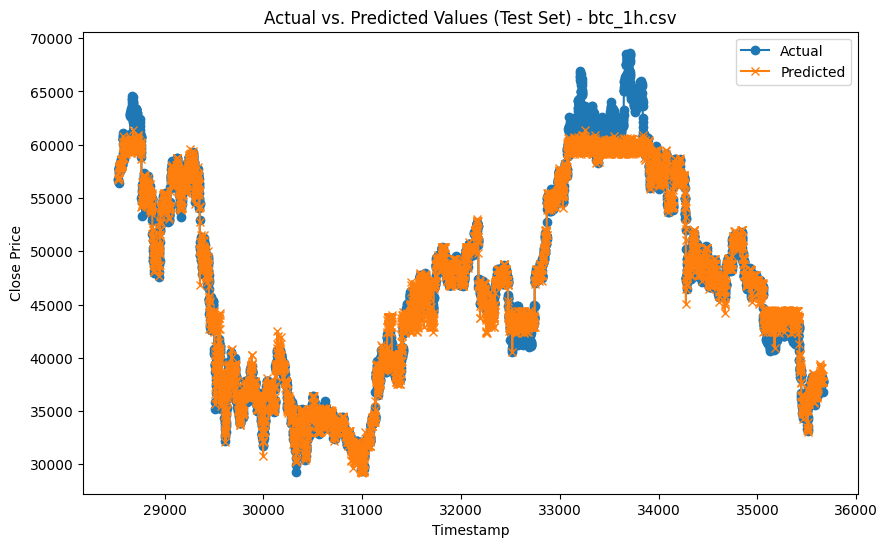

R-squared for btc_1h.csv: 0.9778957711965063
--------------------------------------------------
Mean Squared Error for btc_2h.csv: 2042131.0597532322


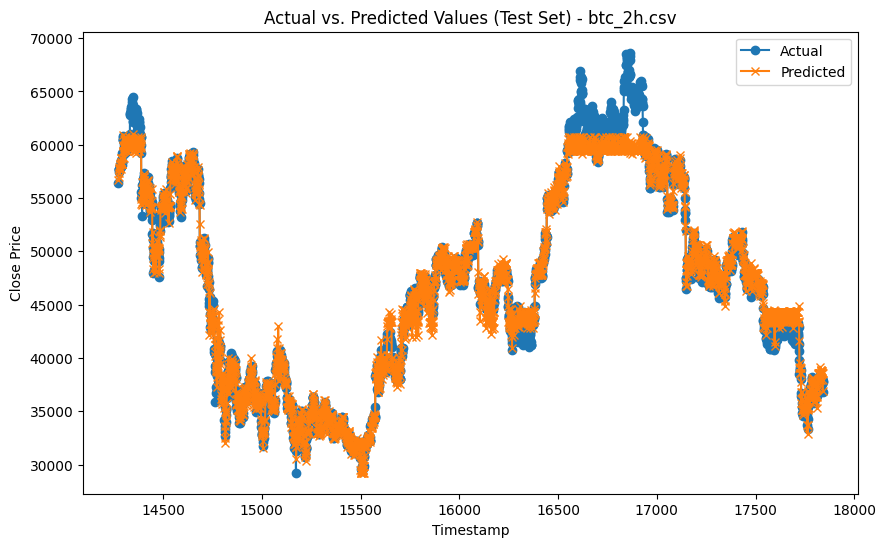

R-squared for btc_2h.csv: 0.9776043690791857
--------------------------------------------------


In [ ]:
import os
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the directory containing your datasets
directory_path = '/content/drive/MyDrive/KDSH 2024/'

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Read the CSV file into a DataFrame
        btc_data = pd.read_csv(file_path)

        # Data preprocessing and feature engineering
        btc_data['datetime'] = pd.to_datetime(btc_data['datetime'])
        btc_data.sort_values(by='datetime', inplace=True)
        btc_data['close_lag1'] = btc_data['close'].shift(1)
        btc_data['close_lag2'] = btc_data['close'].shift(2)
        btc_data['close_lag3'] = btc_data['close'].shift(3)
        btc_data.dropna(inplace=True)

        # Split the data into features (X) and target variable (y)
        X = btc_data[['open', 'high', 'low', 'volume', 'close_lag1', 'close_lag2', 'close_lag3']]
        y = btc_data['close']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Create and train the XGBoost model
        model = xgb.XGBRegressor(objective='reg:squarederror')
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error for {filename}: {mse}')

        # Plot Actual vs. Predicted Values
        plt.figure(figsize=(10, 6))
        plt.plot(X_test.index, y_test, label='Actual', marker='o')
        plt.plot(X_test.index, y_pred, label='Predicted', marker='x')
        plt.title(f'Actual vs. Predicted Values (Test Set) - {filename}')
        plt.xlabel('Timestamp')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

        # Calculate R-squared
        r2 = r2_score(y_test, y_pred)
        print(f'R-squared for {filename}: {r2}')
        print('-' * 50)


In [ ]:
import os
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the directory containing your datasets
directory_path = '/content/drive/MyDrive/KDSH 2024/'

# Create a text file to store the results
output_file_path = os.path.join(directory_path, 'model_results.txt')
with open(output_file_path, 'w') as output_file:
    # Iterate through each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            # Construct the full file path
            file_path = os.path.join(directory_path, filename)

            # Read the CSV file into a DataFrame
            btc_data = pd.read_csv(file_path)

            # Data preprocessing and feature engineering
            btc_data['datetime'] = pd.to_datetime(btc_data['datetime'])
            btc_data.sort_values(by='datetime', inplace=True)
            btc_data['close_lag1'] = btc_data['close'].shift(1)
            btc_data['close_lag2'] = btc_data['close'].shift(2)
            btc_data['close_lag3'] = btc_data['close'].shift(3)
            btc_data.dropna(inplace=True)

            # Split the data into features (X) and target variable (y)
            X = btc_data[['open', 'high', 'low', 'volume', 'close_lag1', 'close_lag2', 'close_lag3']]
            y = btc_data['close']

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

            # Create and train the XGBoost model
            model = xgb.XGBRegressor(objective='reg:squarederror')
            model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test)

            # Calculate Mean Squared Error
            mse = mean_squared_error(y_test, y_pred)

            # Write results to the text file
            output_file.write(f'Mean Squared Error for {filename}: {mse}\n')

            # Calculate R-squared
            r2 = r2_score(y_test, y_pred)

            # Write results to the text file
            output_file.write(f'R-squared for {filename}: {r2}\n')
            output_file.write('-' * 50 + '\n')

            # Plot Actual vs. Predicted Values and save the figure
            plt.figure(figsize=(10, 6))
            plt.plot(X_test.index, y_test, label='Actual', marker='o')
            plt.plot(X_test.index, y_pred, label='Predicted', marker='x')
            plt.title(f'Actual vs. Predicted Values (Test Set) - {filename}')
            plt.xlabel('Timestamp')
            plt.ylabel('Close Price')
            plt.legend()
            plt.savefig(os.path.join(directory_path, f'plot_{filename[:-4]}.png'))
            plt.close()

# Print completion message
print(f'Results saved to {output_file_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Results saved to /content/drive/MyDrive/KDSH 2024/model_results.txt


In [ ]:
import os
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from google.colab import drive

# Install the necessary library for working with Word documents
!pip install python-docx

from docx import Document
from docx.shared import Inches

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory containing your datasets
directory_path = '/content/drive/MyDrive/KDSH 2024/'

# Create a Word document to store the results
output_doc_path = os.path.join(directory_path, 'model_results.docx')
doc = Document()

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Read the CSV file into a DataFrame
        btc_data = pd.read_csv(file_path)

        # Data preprocessing and feature engineering
        btc_data['datetime'] = pd.to_datetime(btc_data['datetime'])
        btc_data.sort_values(by='datetime', inplace=True)
        btc_data['close_lag1'] = btc_data['close'].shift(1)
        btc_data['close_lag2'] = btc_data['close'].shift(2)
        btc_data['close_lag3'] = btc_data['close'].shift(3)
        btc_data.dropna(inplace=True)

        # Split the data into features (X) and target variable (y)
        X = btc_data[['open', 'high', 'low', 'volume', 'close_lag1', 'close_lag2', 'close_lag3']]
        y = btc_data['close']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Create and train the XGBoost model
        model = xgb.XGBRegressor(objective='reg:squarederror')
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)

        # Add text to the Word document
        doc.add_paragraph(f'Mean Squared Error for {filename}: {mse}\n')

        # Calculate R-squared
        r2 = r2_score(y_test, y_pred)

        # Add text to the Word document
        doc.add_paragraph(f'R-squared for {filename}: {r2}\n')
        doc.add_paragraph('-' * 50)

        # Plot Actual vs. Predicted Values and save the figure
        plt.figure(figsize=(10, 6))
        plt.plot(X_test.index, y_test, label='Actual', marker='o')
        plt.plot(X_test.index, y_pred, label='Predicted', marker='x')
        plt.title(f'Actual vs. Predicted Values (Test Set) - {filename}')
        plt.xlabel('Timestamp')
        plt.ylabel('Close Price')
        plt.legend()

        # Save the plot as an image
        image_path = os.path.join(directory_path, f'plot_{filename[:-4]}.png')
        plt.savefig(image_path)
        plt.close()

        # Add the image to the Word document
        doc.add_picture(image_path, width=Inches(6))

# Save the Word document
doc.save(output_doc_path)

# Print completion message
print(f'Results saved to {output_doc_path}')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 3.4 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Results saved to /content/drive/MyDrive/KDSH 2024/model_results.docx


In [ ]:
import os
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import drive
from docx import Document
from docx.shared import Inches

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory containing your datasets
directory_path = '/content/drive/MyDrive/KDSH 2024/'

# Create a Word document to store the results
output_doc_path = os.path.join(directory_path, 'ensemble_results.docx')
doc = Document()

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Read the CSV file into a DataFrame
        btc_data = pd.read_csv(file_path)

        # Data preprocessing and feature engineering
        btc_data['datetime'] = pd.to_datetime(btc_data['datetime'])
        btc_data.sort_values(by='datetime', inplace=True)
        btc_data['close_lag1'] = btc_data['close'].shift(1)
        btc_data['close_lag2'] = btc_data['close'].shift(2)
        btc_data['close_lag3'] = btc_data['close'].shift(3)
        btc_data.dropna(inplace=True)

        # Split the data into features (X) and target variable (y)
        X = btc_data[['open', 'high', 'low', 'volume', 'close_lag1', 'close_lag2', 'close_lag3']]
        y = btc_data['close']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # ARIMA Model
        arima_model = ARIMA(y_train, order=(5,1,0))  # Adjust order as needed
        arima_fit = arima_model.fit()
        arima_pred = arima_fit.forecast(steps=len(y_test))
        arima_mse = mean_squared_error(y_test, arima_pred)
        arima_r2 = r2_score(y_test, arima_pred)

        # LSTM Model
        lstm_model = Sequential()
        lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
        lstm_model.add(Dense(1))
        lstm_model.compile(optimizer='adam', loss='mse')
        X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
        lstm_model.fit(X_train_lstm, y_train, epochs=50, verbose=0)
        X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
        lstm_pred = lstm_model.predict(X_test_lstm)
        lstm_mse = mean_squared_error(y_test, lstm_pred)
        lstm_r2 = r2_score(y_test, lstm_pred)

        # XGBoost Model
        xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict(X_test)
        xgb_mse = mean_squared_error(y_test, xgb_pred)
        xgb_r2 = r2_score(y_test, xgb_pred)

        # Ensemble Prediction (Simple Average)
        ensemble_pred = (arima_pred + lstm_pred.flatten() + xgb_pred) / 3
        ensemble_mse = mean_squared_error(y_test, ensemble_pred)
        ensemble_r2 = r2_score(y_test, ensemble_pred)

        # Add text to the Word document
        doc.add_paragraph(f'Mean Squared Error for {filename} (ARIMA): {arima_mse}\n')
        doc.add_paragraph(f'Mean Squared Error for {filename} (LSTM): {lstm_mse}\n')
        doc.add_paragraph(f'Mean Squared Error for {filename} (XGBoost): {xgb_mse}\n')
        doc.add_paragraph(f'Mean Squared Error for {filename} (Ensemble): {ensemble_mse}\n')

        doc.add_paragraph(f'R-squared for {filename} (ARIMA): {arima_r2}\n')
        doc.add_paragraph(f'R-squared for {filename} (LSTM): {lstm_r2}\n')
        doc.add_paragraph(f'R-squared for {filename} (XGBoost): {xgb_r2}\n')
        doc.add_paragraph(f'R-squared for {filename} (Ensemble): {ensemble_r2}\n')

        doc.add_paragraph('-' * 50)

        # Plot Actual vs. Predicted Values and save the figure
        plt.figure(figsize=(10, 6))
        plt.plot(X_test.index, y_test, label='Actual', marker='o')
        plt.plot(X_test.index, arima_pred, label='ARIMA', marker='x')
        plt.plot(X_test.index, lstm_pred, label='LSTM', marker='x')
        plt.plot(X_test.index, xgb_pred, label='XGBoost', marker='x')
        plt.plot(X_test.index, ensemble_pred, label='Ensemble', marker='x')
        plt.title(f'Actual vs. Predicted Values (Test Set) - {filename}')
        plt.xlabel('Timestamp')
        plt.ylabel('Close Price')
        plt.legend()

        # Save the plot as an image
        image_path = os.path.join(directory_path, f'ensemble_plot_{filename[:-4]}.png')
        plt.savefig(image_path)
        plt.close()

        # Add the image to the Word document
        doc.add_picture(image_path, width=Inches(6))


# Save the Word document
doc.save(output_doc_path)

# Print completion message
print(f'Results saved to {output_doc_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
%pip install pandas
%pip install xgboost
%pip install statsmodels
%pip install tensorflow
%pip install scikit-learn
%pip install matplotlib
%pip install python-docx

import os
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import drive
from docx import Document
from docx.shared import Inches
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory containing your datasets
directory_path = '/content/drive/MyDrive/KDSH 2024/'

# Create a Word document to store the results
output_doc_path = os.path.join(directory_path, 'ensemble_results.docx')
doc = Document()

# Define a function to calculate additional metrics
def calculate_metrics(actual, predicted, trades):
    gross_profit = sum(trades[trades > 0])
    gross_loss = abs(sum(trades[trades < 0]))
    net_profit = gross_profit - gross_loss
    total_closed_trades = len(trades)
    win_rate = (sum(trades > 0) / total_closed_trades) * 100 if total_closed_trades > 0 else 0
    max_drawdown = np.max(np.cumsum(-trades))
    avg_winning_trade = np.mean(trades[trades > 0])
    avg_losing_trade = np.mean(trades[trades < 0])
    buy_and_hold_return = (actual.iloc[-1] - actual.iloc[0]) / actual.iloc[0] * 100
    largest_losing_trade = np.min(trades)
    largest_winning_trade = np.max(trades)
    sharpe_ratio = np.sqrt(252) * np.mean(trades) / np.std(trades)
    sortino_ratio = np.sqrt(252) * np.mean(trades) / np.std(trades[trades < 0])
    average_holding_duration = np.mean(np.diff(actual.index))

    # Assuming running trades as the difference between actual and predicted values
    running_trades = actual - predicted
    max_dip = np.min(running_trades)
    avg_dip = np.mean(running_trades)

    return (gross_profit, net_profit, total_closed_trades, win_rate,
            max_drawdown, gross_loss, avg_winning_trade, avg_losing_trade,
            buy_and_hold_return, largest_losing_trade, largest_winning_trade,
            sharpe_ratio, sortino_ratio, average_holding_duration,
            max_dip, avg_dip)

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Read the CSV file into a DataFrame
        btc_data = pd.read_csv(file_path)

        # Data preprocessing and feature engineering
        btc_data['datetime'] = pd.to_datetime(btc_data['datetime'])
        btc_data.sort_values(by='datetime', inplace=True)
        btc_data['close_lag1'] = btc_data['close'].shift(1)
        btc_data['close_lag2'] = btc_data['close'].shift(2)
        btc_data['close_lag3'] = btc_data['close'].shift(3)
        btc_data.dropna(inplace=True)

        # Split the data into features (X) and target variable (y)
        X = btc_data[['open', 'high', 'low', 'volume', 'close_lag1', 'close_lag2', 'close_lag3']]
        y = btc_data['close']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # ARIMA Model
        arima_model = ARIMA(y_train, order=(5, 1, 0))
        arima_fit = arima_model.fit()
        arima_pred = arima_fit.forecast(steps=len(y_test))

        # XGBoost Model
        xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict(X_test)

        # Random Forest Model
        rf_model = RandomForestRegressor()
        rf_model.fit(X_train, y_train)
        rf_pred = rf_model.predict(X_test)

        # Ensemble Prediction (Simple Average)
        ensemble_pred = (arima_pred + xgb_pred + rf_pred) / 3

        # Calculate additional metrics
        trades = np.diff(ensemble_pred)
        metrics = calculate_metrics(y_test, ensemble_pred, trades)

        # Add text to the Word document
        doc.add_paragraph(f'Metrics for {filename} (Ensemble of ARIMA, XGBoost, and Random Forest):\n')
        doc.add_paragraph(f'1. Gross Profit: {metrics[0]}\n'
                          f'2. Net Profit: {metrics[1]}\n'
                          f'3. Total Closed Trades: {metrics[2]}\n'
                          f'4. Win Rate (Profitability %): {metrics[3]:.2f}%\n'
                          f'5. Max Drawdown: {metrics[4]}\n'
                          f'6. Gross Loss: {metrics[5]}\n'
                          f'7. Average Winning Trade (in USDT): {metrics[6]}\n'
                          f'8. Average Losing Trade (in USDT): {metrics[7]}\n'
                          f'9. Buy and Hold Return of BTC: {metrics[8]:.2f}%\n'
                          f'10. Largest Losing Trade (in USDT): {metrics[9]}\n'
                          f'11. Largest Winning Trade (in USDT): {metrics[10]}\n'
                          f'12. Sharpe Ratio: {metrics[11]}\n'
                          f'13. Sortino Ratio: {metrics[12]}\n'
                          f'14. Average Holding Duration per Trade: {metrics[13]}\n'
                          f'15. Max Dip and Average Dip in Running Trade: {metrics[14]}, {metrics[15]}\n')
        doc.add_paragraph('-' * 50)

        # Plot Actual vs. Predicted Values and save the figure
        plt.figure(figsize=(10, 6))
        plt.plot(X_test.index, y_test, label='Actual', marker='o')
        plt.plot(X_test.index, ensemble_pred, label='Ensemble', marker='x')
        plt.title(f'Actual vs. Predicted Values (Test Set) - {filename}')
        plt.xlabel('Timestamp')
        plt.ylabel('Close Price')
        plt.legend()

        # Save the plot as an image
        image_path = os.path.join(directory_path, f'ensemble_plot_{filename[:-4]}.png')
        plt.savefig(image_path)
        plt.close()

        # Add the image to the Word document
        doc.add_picture(image_path, width=Inches(6))

# Save the Word document
doc.save(output_doc_path)

# Print completion message
print(f'Results saved to {output_doc_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this